In [1]:
!pip install ultralytics roboflow
from ultralytics import YOLO

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 20.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 18.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 61.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 105.3 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.12.0.88
    Uninstalling opencv-python-headless-4.12.0.88:
      Successfully uninstalled opencv-python-headless-4.12.0.88
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with

In [5]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="Q9xRf8jjvhpqD0Psn0qK")
project = rf.workspace("iot-c1gfq").project("cp-iot-vyhqw")
version = project.version(1)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...


In [6]:
!ls /content



Cp-IoT-1  sample_data


In [7]:
!ls /content/Cp-IoT-1


data.yaml  README.dataset.txt  README.roboflow.txt  test  train  valid


In [8]:
# cria o modelo baseado no YOLOv8 "n" (versão leve)
model = YOLO("yolov8n.pt")

# treina o modelo com seu dataset Roboflow
model.train(
    data="/content/Cp-IoT-1/data.yaml",  # caminho do seu dataset
    epochs=50,       # quantidade de épocas
    imgsz=640,       # tamanho das imagens
    batch=16,        # tamanho do batch
    patience=10      # parada antecipada se estabilizar
)

Ultralytics 8.3.213 🚀 Python-3.12.12 torch-2.8.0+cu126 CPU (Intel Xeon CPU @ 2.20GHz)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/Cp-IoT-1/data.yaml, degrees=0.0, deterministic=True, device=cpu, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=10, perspective=0.0, plots=True, pose=1

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7af259974d40>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04804

In [17]:
from ultralytics import YOLO
model = YOLO("/content/runs/detect/train/weights/best.pt")

In [19]:
results = model.predict(
    source="/content/Cp-IoT-1/test/images",
    conf=0.25,
    save=True,
    show_labels=True,
    show_conf=True
)



image 1/4 /content/Cp-IoT-1/test/images/00009_jpg.rf.f0d4be6b6f29804f5a52481e2ca3ef58.jpg: 640x640 (no detections), 331.5ms
image 2/4 /content/Cp-IoT-1/test/images/00016_jpg.rf.07b0f7bcf172dc5ea74b0dd3b55b3103.jpg: 640x640 (no detections), 370.3ms
image 3/4 /content/Cp-IoT-1/test/images/00020_jpg.rf.60a1ea64cd2b92323dc8a45fcaf91c20.jpg: 640x640 (no detections), 633.0ms
image 4/4 /content/Cp-IoT-1/test/images/00030_jpg.rf.fdf600f26c09c5f8d7258b9119abe674.jpg: 640x640 (no detections), 604.6ms
Speed: 8.1ms preprocess, 484.8ms inference, 3.6ms postprocess per image at shape (1, 3, 640, 640)
Results saved to /content/runs/detect/predict2


In [20]:
!cat /content/Cp-IoT-1/data.yaml


names:
- carro
- motos
nc: 2
roboflow:
  license: CC BY 4.0
  project: cp-iot-vyhqw
  url: https://universe.roboflow.com/iot-c1gfq/cp-iot-vyhqw/dataset/1
  version: 1
  workspace: iot-c1gfq
test: ../test/images
train: ../train/images
val: ../valid/images


In [21]:
!cat /content/runs/detect/train/results.csv | tail -n 5


17,736.377,0.76303,1.22796,1.21116,0.87318,0.5,0.8056,0.4,1.24266,3.06358,2.28489,0.000569447,0.000569447,0.000569447
18,778.918,0.78761,1.23872,1.21832,0.87827,0.5,0.80202,0.4451,1.16671,2.84751,2.01317,0.000586121,0.000586121,0.000586121
19,822.368,0.73396,1.19801,1.18691,0.99508,0.5,0.83474,0.52536,1.03635,2.7641,1.85834,0.000600813,0.000600813,0.000600813
20,863.514,0.74752,1.35716,1.21457,0.67348,0.75,0.81251,0.55318,1.02273,2.67101,1.74696,0.000613526,0.000613526,0.000613526
21,905.523,0.82867,1.2046,1.22356,0.81188,0.73738,0.86595,0.54802,1.07143,2.68594,1.76255,0.000624258,0.000624258,0.000624258



image 1/4 /content/Cp-IoT-1/test/images/00009_jpg.rf.f0d4be6b6f29804f5a52481e2ca3ef58.jpg: 640x640 (no detections), 340.7ms
image 2/4 /content/Cp-IoT-1/test/images/00016_jpg.rf.07b0f7bcf172dc5ea74b0dd3b55b3103.jpg: 640x640 1 carro, 305.1ms
image 3/4 /content/Cp-IoT-1/test/images/00020_jpg.rf.60a1ea64cd2b92323dc8a45fcaf91c20.jpg: 640x640 1 carro, 338.8ms
image 4/4 /content/Cp-IoT-1/test/images/00030_jpg.rf.fdf600f26c09c5f8d7258b9119abe674.jpg: 640x640 1 carro, 328.9ms
Speed: 7.2ms preprocess, 328.4ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)
Results saved to /content/runs/detect/predict4


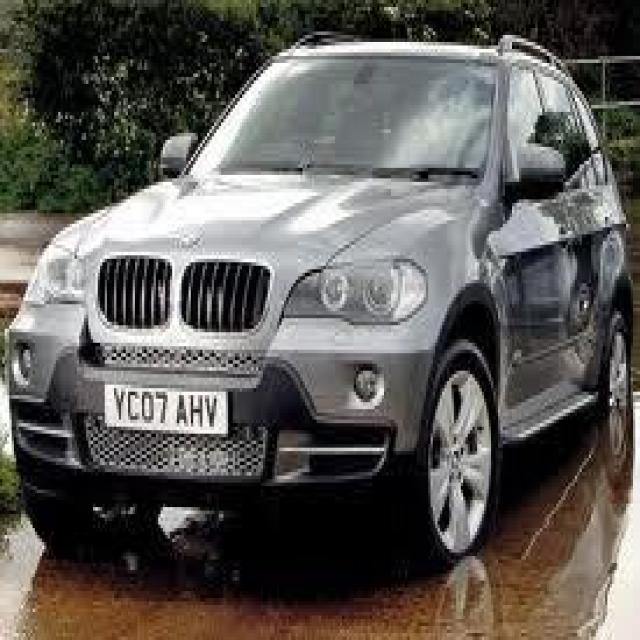

In [24]:
from ultralytics import YOLO

model = YOLO("/content/runs/detect/train/weights/best.pt")

# força o YOLO a mostrar tudo, mesmo com baixa confiança
results = model.predict(
    source="/content/Cp-IoT-1/test/images",
    conf=0.05,         # reduz confiança
    save=True,
    show_labels=True,
    show_conf=True
)

results[0].show()  # mostra a 1ª imagem direto no Colab


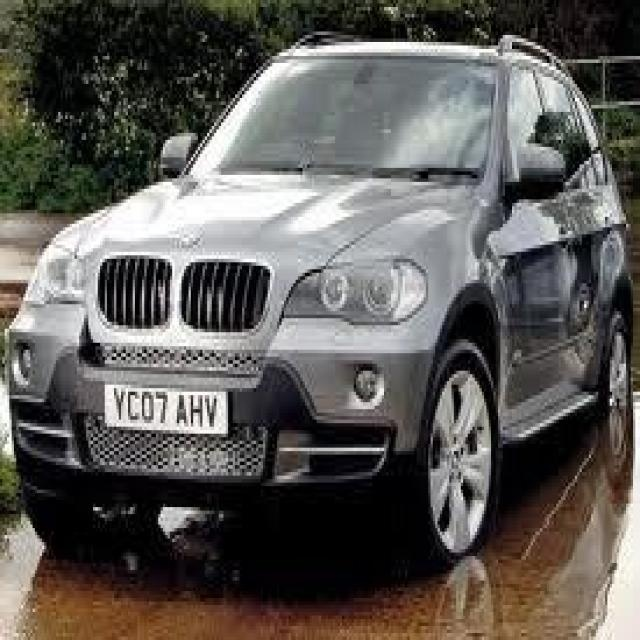

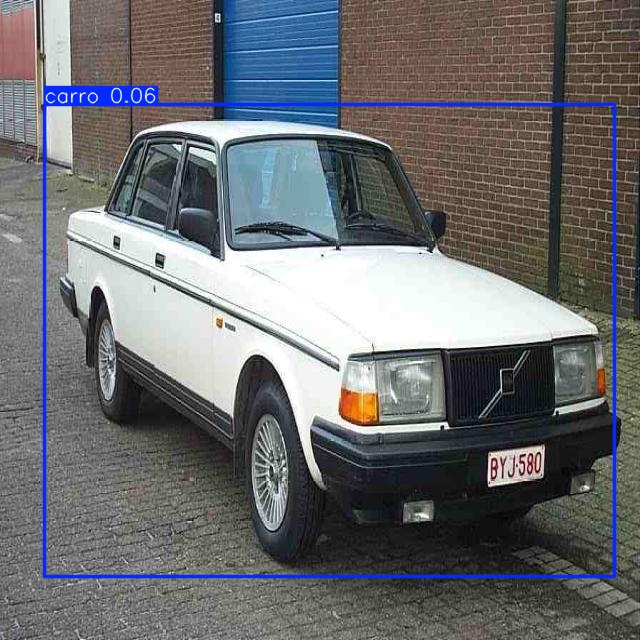

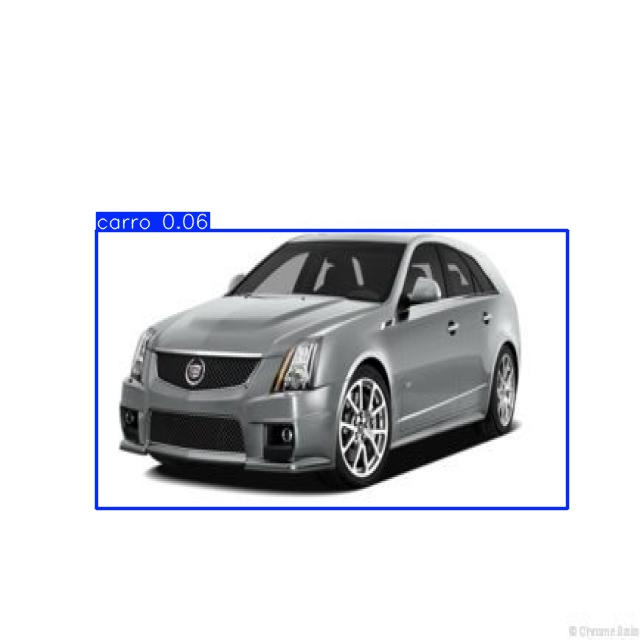

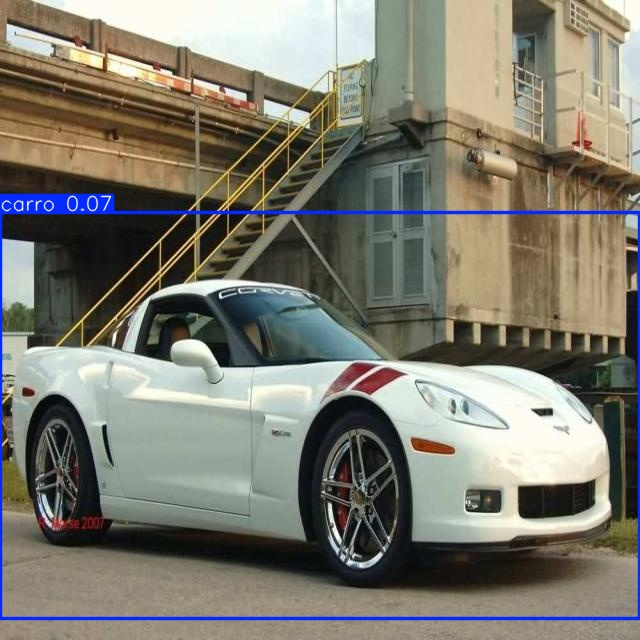

In [25]:
import glob
from IPython.display import Image, display

for img_path in glob.glob("/content/runs/detect/predict4/*.jpg")[:5]:
    display(Image(filename=img_path))


In [26]:
model.train(data="/content/Cp-IoT-1/data.yaml", epochs=50, imgsz=640)


Ultralytics 8.3.213 🚀 Python-3.12.12 torch-2.8.0+cu126 CPU (Intel Xeon CPU @ 2.20GHz)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/Cp-IoT-1/data.yaml, degrees=0.0, deterministic=True, device=cpu, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=/content/runs/detect/train/weights/best.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train2, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, p

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7af37758eae0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04804

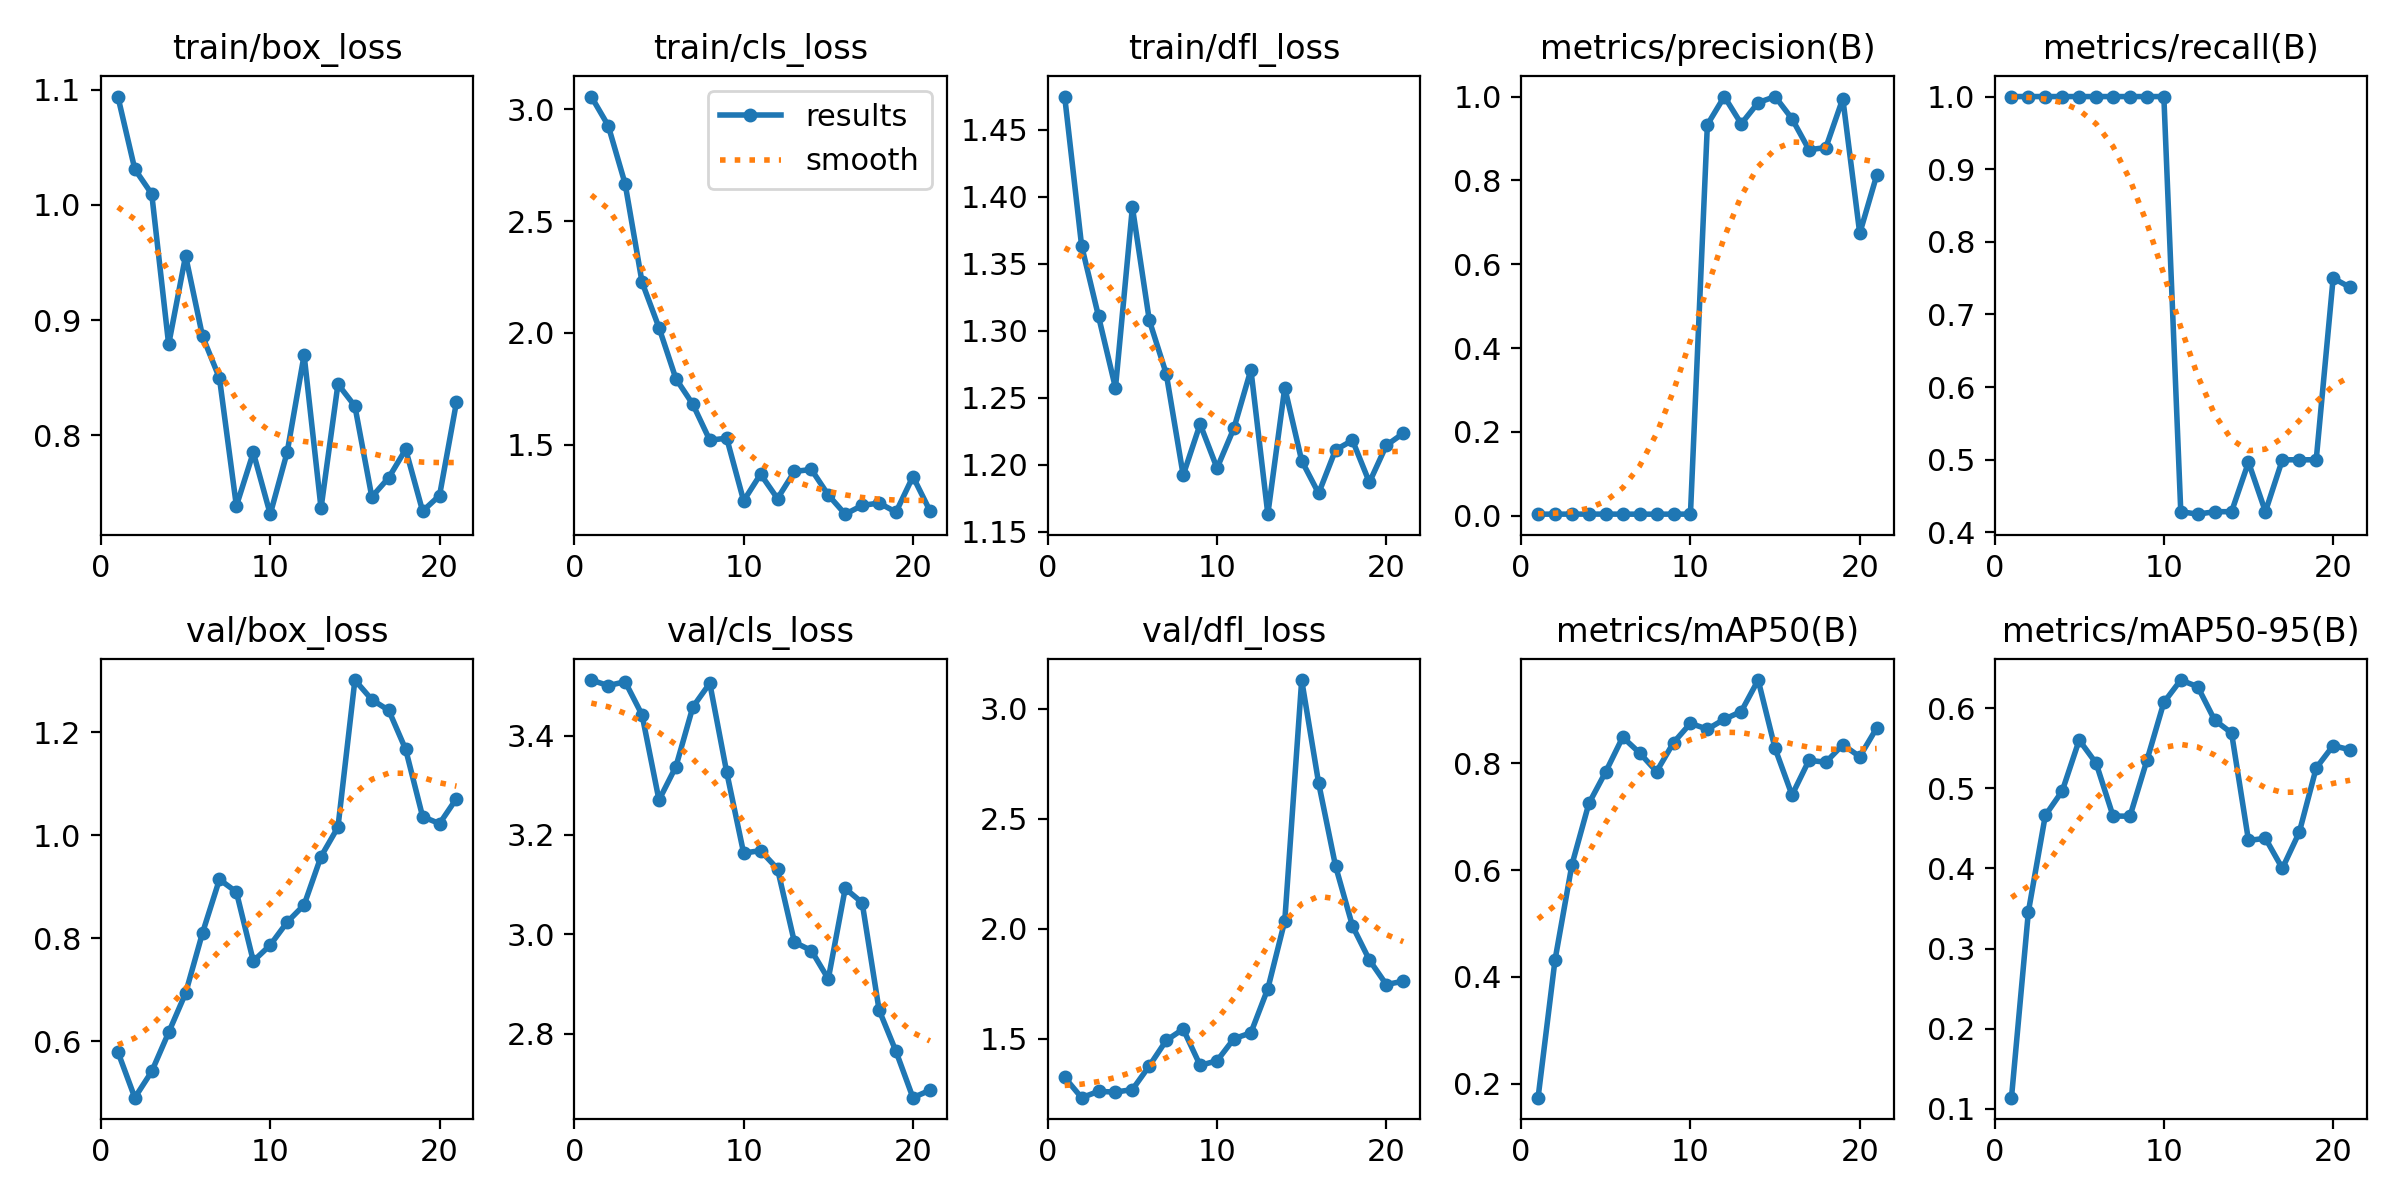

In [28]:
from IPython.display import Image
Image(filename="/content/runs/detect/train/results.png")


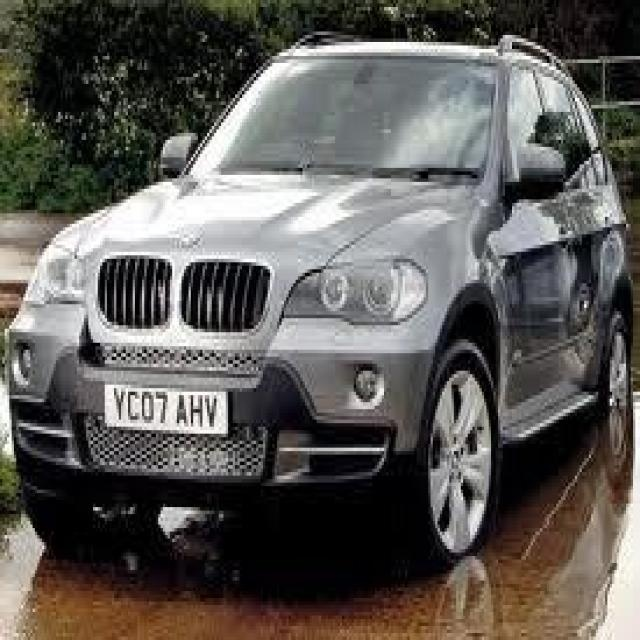

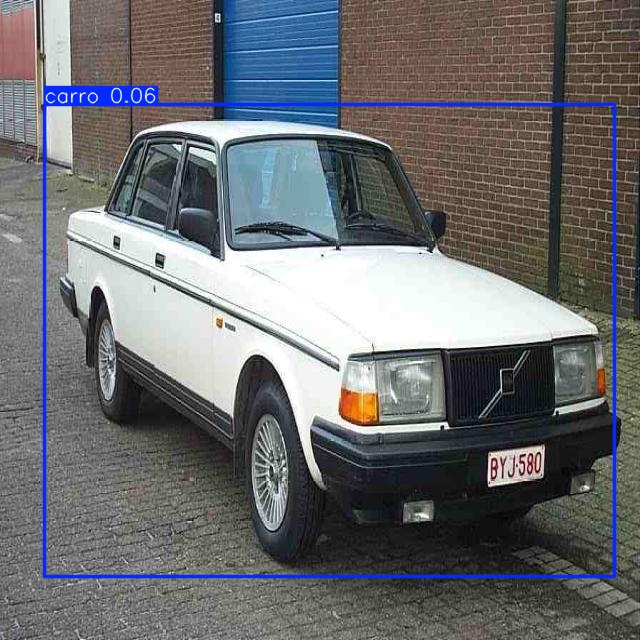

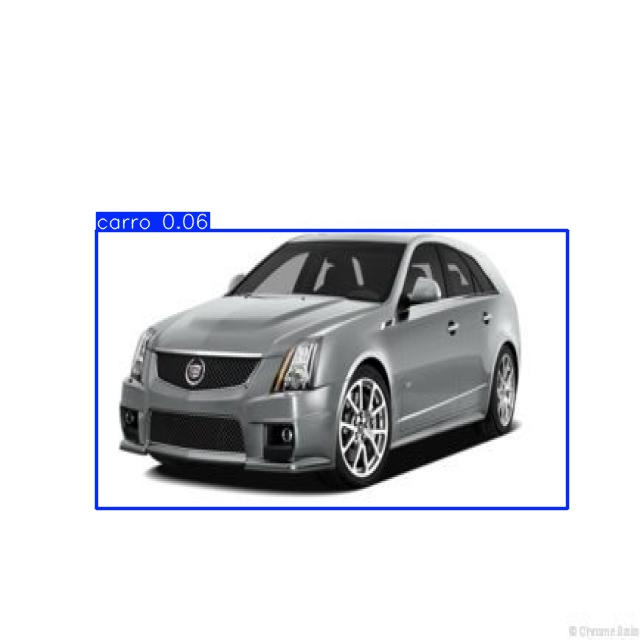

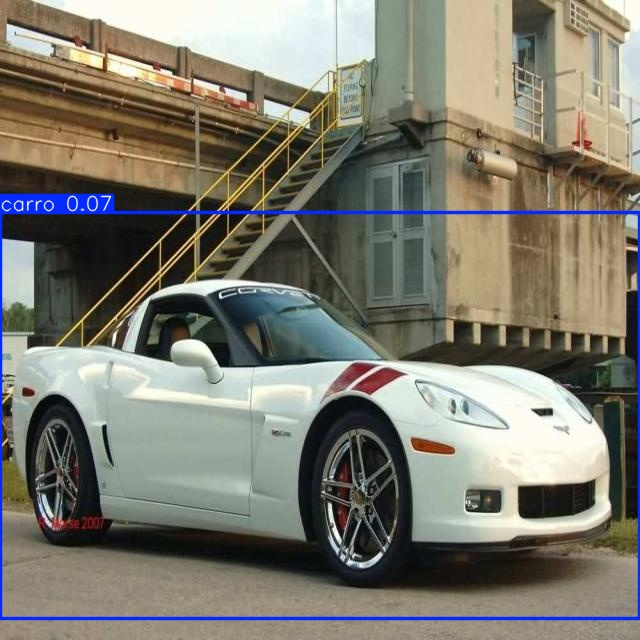

In [32]:
import glob
from IPython.display import Image, display

for img_path in glob.glob("/content/runs/detect/predict4/*.jpg")[:5]:
    display(Image(filename=img_path))
